In [28]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Gathering
# Load data from JSON file
with open('new_bus_json.json', 'r') as f:
    data = json.load(f)

# Convert JSON data to DataFrame
sensor_data = pd.DataFrame(data['sensorData']['jsonData']).T
sensor_data

,count,humidity,pressure,temperature,oxygenSensor
-NlJJWAq0weZ-2Ma2s2I,0.0,45.48,99.09,23.68,NaN
-NlJJWpxBWvtf89oy_8j,0.0,45.99,99.09,23.78,NaN
-NlJJXU-HIxTWY9fY1yU,0.0,46.34,99.09,23.74,NaN
-NlJJY7N0Hqj-mAfZhuW,0.0,46.19,99.09,23.74,NaN
-NlJJYlN7-idCOC5_nNI,0.0,46.47,99.09,23.78,NaN
...,...,...,...,...,...
-Nv0Q-pNPJzMrIadKZRk,5.0,40.85,99.60,23.71,20.74
-Nv0Q0lnZwZPIqzpPIFF,5.0,41.07,99.60,23.71,20.73
-Nv0Q1iIDUka3IzUUCQj,5.0,40.92,99.60,23.71,20.74
-Nv0Q2etjcgE3ZR6QQ_q,5.0,41.16,99.60,23.71,20.73


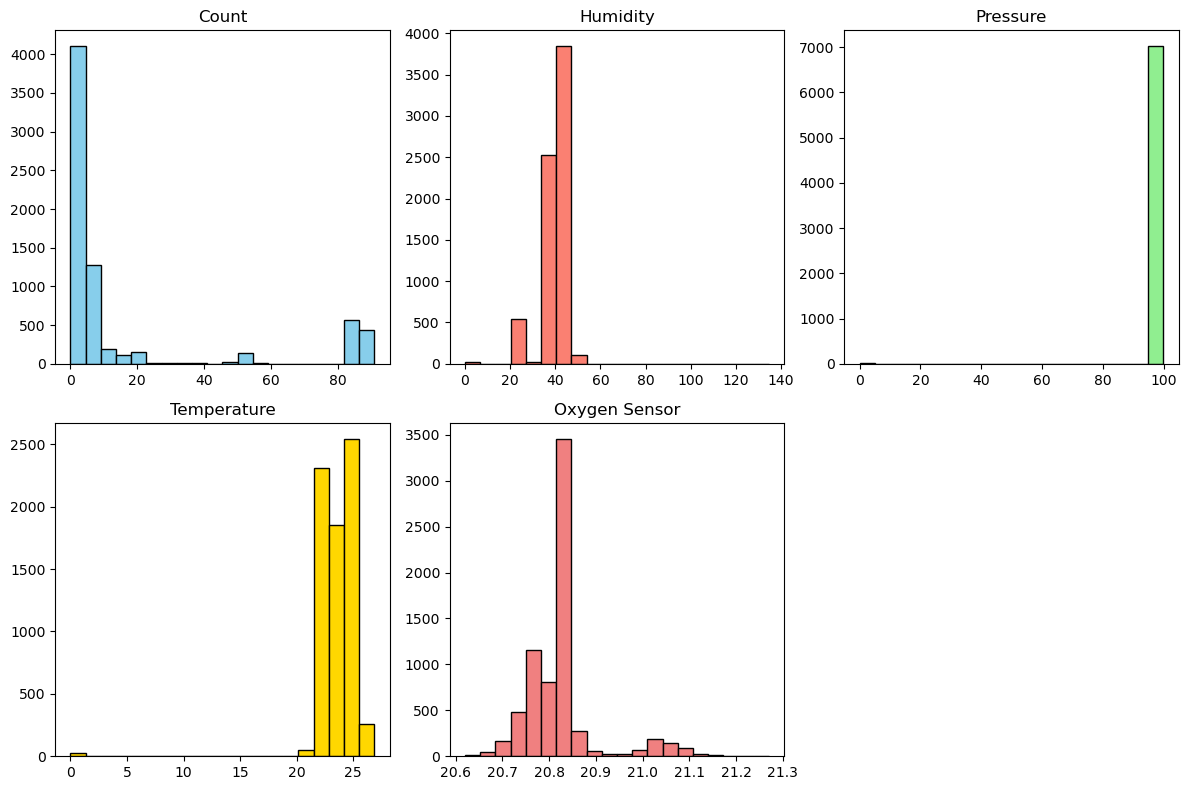

In [35]:
import matplotlib.pyplot as plt

# Plot histograms for each column
plt.figure(figsize=(12, 8))

# Histogram for 'count'
plt.subplot(2, 3, 1)
plt.hist(sensor_data['count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Count')

# Histogram for 'humidity'
plt.subplot(2, 3, 2)
plt.hist(sensor_data['humidity'], bins=20, color='salmon', edgecolor='black')
plt.title('Humidity')

# Histogram for 'pressure'
plt.subplot(2, 3, 3)
plt.hist(sensor_data['pressure'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Pressure')

# Histogram for 'temperature'
plt.subplot(2, 3, 4)
plt.hist(sensor_data['temperature'], bins=20, color='gold', edgecolor='black')
plt.title('Temperature')

# Histogram for 'oxygenSensor'
plt.subplot(2, 3, 5)
plt.hist(sensor_data['oxygenSensor'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Oxygen Sensor')

plt.tight_layout()
plt.show()


In [29]:
print(sensor_data.describe())

             count     humidity     pressure  temperature  oxygenSensor
count  7048.000000  7048.000000  7048.000000  7048.000000   4084.000000
mean     17.159620    40.485480    98.336019    23.700681     20.819167
std      29.646112     5.780863     5.892388     1.862144      0.101321
min       0.000000     0.000000     0.000000     0.000000     20.620000
25%       2.000000    39.580000    98.280000    22.710000     20.760000
50%       4.000000    40.840000    98.490000    23.410000     20.790000
75%       9.000000    43.960000    99.060000    25.110000     20.840000
max      91.000000   134.570000    99.820000    26.860000     21.270000


In [30]:
print("Missing values:", sensor_data.isnull().sum())

Missing values: count              0
humidity           0
pressure           0
temperature        0
oxygenSensor    2964
dtype: int64


In [31]:
# Pre-processing
# Handle missing values if any
sensor_data.fillna(sensor_data.mean(), inplace=True)  # Fill missing values with mean

In [32]:
print("Missing values:", sensor_data.isnull().sum())

Missing values: count           0
humidity        0
pressure        0
temperature     0
oxygenSensor    0
dtype: int64


In [33]:
num_rows = sensor_data.shape[0]
print("Number of rows:", num_rows)


Number of rows: 7048


In [37]:
# Select features and target variable
X = sensor_data[['count', 'humidity', 'pressure', 'temperature']]  # Features
y = sensor_data['oxygenSensor']  # Target variable

# Step 5: Model Selection
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the Model
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor.fit(X_train, y_train)

# Step 7: Performance Evaluation
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [38]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.0007941964610995883
R-squared Score: 0.8651848482394753


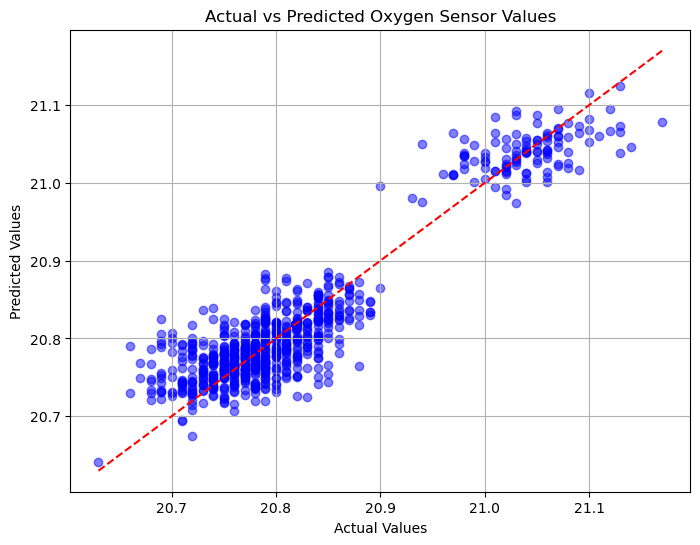

In [39]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Oxygen Sensor Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


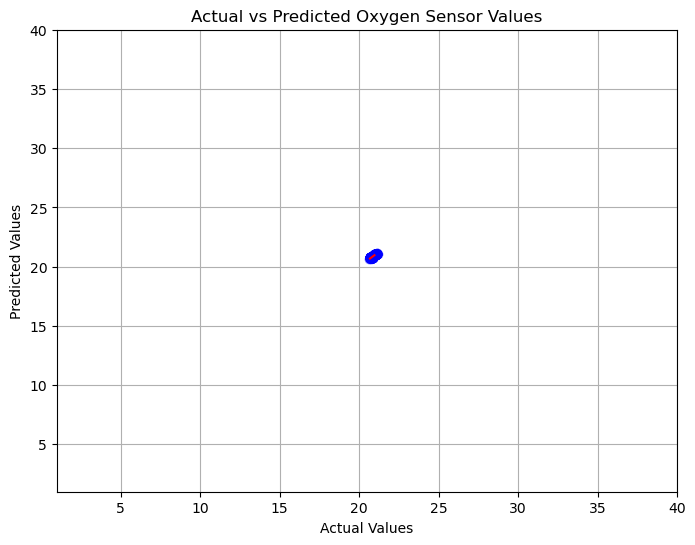

In [40]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Oxygen Sensor Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(1, 40)  # Set x-axis limits from 1 to 40
plt.ylim(1, 40)  # Set y-axis limits from 1 to 40
plt.grid(True)
plt.show()
